# Clustering Algorithms - Hierarchical Clustering

**Hierarchical clustering** determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

- **Agglomerative clustering** is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

- **Divisive clustering** is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a **dendrogram**. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a **deterministic** process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The **strengths** of hierarchical clustering methods include the following:

- They often reveal the finer details about the relationships between data objects.
- They provide an interpretable dendrogram.

The **weaknesses** of hierarchical clustering methods include the following:

- They’re computationally expensive with respect to algorithm complexity.
- They’re sensitive to noise and outliers.

## Agglomerative clustering algorithm

### Rationale
Agglomerative clustering is based on the principle of merging the most similar pairs of clusters at each iteration, until all data points are merged into a single cluster. The similarity between two clusters is typically defined in terms of a distance metric, such as Euclidean distance or cosine similarity, which measures how similar or dissimilar two clusters are based on the distances between their data points.

The agglomerative clustering algorithm starts by treating each data point as a single-element cluster, and then proceeds to iteratively merge the most similar pairs of clusters until all data points belong to a single cluster. At each iteration, the algorithm computes the pairwise distances between all remaining clusters and identifies the two closest clusters based on some similarity measure. These two clusters are then merged into a new cluster, which is added to the list of clusters. The algorithm continues to merge the most similar pairs of clusters until there is only one cluster left.

The resulting dendrogram provides a hierarchical representation of the data, where the leaves of the dendrogram correspond to the individual data points, and the internal nodes correspond to clusters that are formed by merging the most similar pairs of clusters. The height of each internal node in the dendrogram represents the distance between the two clusters that were merged to form the node. Therefore, the dendrogram can be used to visualize the hierarchical relationships between the clusters and to identify patterns and structures in the data.

Agglomerative clustering has several advantages over other clustering algorithms. For example, it can handle non-convex and irregularly shaped clusters, it does not require the specification of the number of clusters in advance, and it can be easily extended to handle large datasets. However, agglomerative clustering can be computationally expensive, especially when the number of data points is large, and it can be sensitive to the choice of distance metric and linkage criterion.

### Implementation

For our implemenetation of this algorithm, we need to define how to compute the distance D(C<sub>new</sub>, C) between a newly formed cluster C<sub>new</new> and each old cluster C.

- Method 1: **Minimum**
    One commonly used approach defines the distance between clusters C<sub>1</sub> and C<sub>2</sub> as the smallest distance between any pair of elements from these clusters.

    D<sub>min</sub>(C1,C2) = min<sub>all points i in cluster C1, all points j in cluster C2</sub>D<sub>i,j</sub>.

- Method 2: **Average**
    The distance function that is encountered in the unweighted pair group method with arithmetic mean (UPGMA) algorithm  uses the average distance between elements in two clusters.

    $$
        D_\text{avg}(C_1, C_2) = \dfrac{\sum_{\text{all points }i\text{ in cluster }C_1} ~\sum_{\text{all points }j\text{ in cluster }C_2} D_{i,j}}{|C_1| \cdot |C_2|}
    $$


Let's implement it in Python!

In [8]:
def HierarchicalClustering(distance_matrix, agg_method='average'):
    clusters = [[i] for i in range(len(distance_matrix))]

    new_clusters_list = []
    while len(clusters) != 1:

        ## Find the two closest clusters
        min_dist = float('inf')
        for i in range(len(clusters) - 1):
            for j in range(i + 1, len(clusters)):
                if agg_method == 'average':
                    dist = 0
                    for idx1 in clusters[i]:
                        for idx2 in clusters[j]:
                            dist += distance_matrix[idx1][idx2]
                    dist /= (len(clusters[i]) * len(clusters[j]))
                elif agg_method == 'min':
                    dist = float('inf')
                    for idx1 in clusters[i]:
                        for idx2 in clusters[j]:
                            current = distance_matrix[idx1][idx2]
                            if current < dist:
                                dist = current
                elif agg_method == 'max':
                    dist = -1
                    for idx1 in clusters[i]:
                        for idx2 in clusters[j]:
                            current = distance_matrix[idx1][idx2]
                            if current > dist:
                                dist = current
                else:
                    raise Exception('Agglomeration method not implemented!')
                if dist < min_dist:
                    min_dist = dist
                    closest_idx1 = i
                    closest_idx2 = j

        ## Merge the two closeet clusters
        new_cluster = clusters[closest_idx1] + clusters[closest_idx2]
        clusters = [clu for clu in clusters if clu not in [clusters[closest_idx1], clusters[closest_idx2]]]
        clusters.append(new_cluster)
        new_clusters_list.append(new_cluster)
    return new_clusters_list

Now let's run this algorithm on a dataset. 

In [9]:
# load data from txt file
with open('data/data2.txt', 'r') as file:
    data = [list(map(float, line.strip().split())) for line in file]

In [10]:
#run algorithm
new_clusters_list = HierarchicalClustering(data, 'average')

for clu in new_clusters_list:
    print(' '.join([str(x + 1) for x in clu]))

1 18
3 9
4 6
5 11
15 4 6
2 1 18
16 20
10 14
7 19
13 3 9
12 2 1 18
8 12 2 1 18
17 16 20
7 19 17 16 20
15 4 6 13 3 9
5 11 10 14
8 12 2 1 18 15 4 6 13 3 9
7 19 17 16 20 8 12 2 1 18 15 4 6 13 3 9
5 11 10 14 7 19 17 16 20 8 12 2 1 18 15 4 6 13 3 9


The result of applying Agglomerative Hierarchical Clustering to our sample distance matrix (using D<sub>avg</sub>) is displayed above, with each newly created cluster listed on each line.

Let's try to visualize our hierarchical clustering better with a dendrogram. 

/var/folders/h_/8gdqy3vn12q_dn5vxxnf7k6m0000gn/T/ipykernel_56476/2044415589.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(data, method='average')


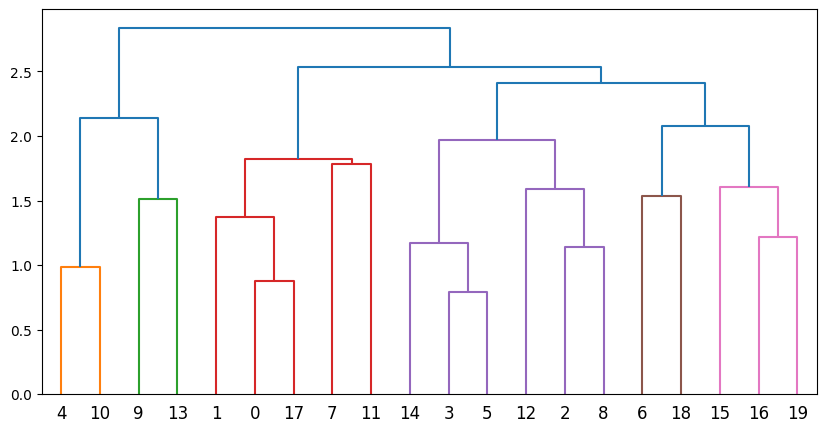

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

"""
This code computes the linkage matrix using the linkage() function in scipy, 
which takes the distance matrix as input and the linkage method as an argument (average in this case).
The resulting linkage matrix Z contains information about the hierarchical clustering. 
The dendrogram() function in scipy can then be used to plot the dendrogram based on this linkage matrix. 
"""

# Compute the linkage matrix
Z = linkage(data, method='average')

# Plot the dendrogram
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.show()

**Resources**:

- [K-Means Clustering in Python: A Practical Guide, by Kevin Arvai](https://realpython.com/k-means-clustering-python/#reader-comments)
- [Github repo with functions written from scratch](https://github.com/egeulgen/Bioinformatics_Textbook_Track/tree/7d0109aeffeab0b4b38faff75879cdaabb5c0198)